In [1]:
from manim import *

config.media_width = "75%"
config.verbosity = "WARNING"

Manim Community v0.18.0.post0

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance

# Clustering and Distance Metrics 
### Based on Exam Topic Ideas 2024 for Math Concepts for Developers @ SoftUni

## References

1. [math](https://numerics.mathdotnet.com/Distance)
    + MathJax equations with perfect notation
    + L1, L2, MSE

2. [distance-metrics-euclidean-manhattan-minkowski-oh](https://www.kdnuggets.com/2023/03/distance-metrics-euclidean-manhattan-minkowski-oh.html)
    + Properties of Distance Metrics
    + 2d plots
    + python calculations

3. [types-of-distance-metrics-in-machine-learning](https://www.analyticsvidhya.com/blog/2020/02/4-types-of-distance-metrics-in-machine-learning/)
    + Hamming Distance (categorical)
    - bad visualisations 
    - bad notation

4. [Metric space - wiki 4 ever](https://en.wikipedia.org/wiki/Metric_space)

5. [7-important-distance-metrics-every-data-scientist-should-know](https://medium.com/geekculture/7-important-distance-metrics-every-data-scientist-should-know-11e1b0b2ebe3)

6. [distance-metrics medium](https://srikgorthy.medium.com/distance-metrics-9f5830322dee)
    + 4 properties of distance

7. [vector-norms](https://builtin.com/data-science/vector-norms)
    + L1, L2, Linf, L0

## Helper functions

In [3]:
def set_coordinate_system(
        ax = None,
        x_min = 0,
        x_max = 6,
        y_min = 0,
        y_max = 6,
        arrowhead_offset = 0.1,
        o_offset = -0.4,
        ):
    """
    Sets aspect ratio, spines and ticks of an axis to accurately visualize two-dimensional Cartesian coordinate system.
    """
    ax = ax or plt.gca()
    
    ax.set_aspect("equal")

    ax.spines["bottom"].set_position("zero")
    ax.spines["left"].set_position("zero")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.set_xlabel("x", loc = "right")
    ax.set_ylabel("y", loc = "top", rotation = 0)

    ax.set_xlim(x_min - 1, x_max)
    ax.set_ylim(y_min - 1, y_max)

    ax.set_xticks([x for x in range(x_min, x_max) if x!=0])
    ax.set_yticks([y for y in range(y_min, y_max) if y!=0])

    ax.plot(x_max - arrowhead_offset, 0, '>k')
    ax.plot(0, y_max - arrowhead_offset, '^k')

    ax.annotate(text="O", xy = [0,0], xytext = [o_offset, o_offset])

    return ax
        

In [4]:
def plot_contours(
        vectorized_distance_function,
        ax = None,
        x_min = -5,
        x_max = 6,
        y_min = -5,
        y_max = 6,
        delta = 0.25,
        levels = range(0, 7)
        ):
        
    x = np.arange(x_min - 1, x_max + 1, delta)
    y = np.arange(y_min - 1, y_max + 1, delta)
    X, Y = np.meshgrid(x, y)
    Z = vectorized_distance_function(X, Y)
   

    ax = ax or plt.gca()

    ax.contourf(X, Y, Z, cmap = "GnBu_r", levels = levels)

    set_coordinate_system(
        ax=ax,
        x_min = x_min,
        x_max = x_max,
        y_min = y_min,
        y_max = y_max,
        )

    return ax


## Clustering Analysis. How Different Metrics Affect Clustering Results
One important application of linear algebra is to calculate distances between two points. There are many different ways to calculate a distance. The one which is probably most familiar to you is the **Euclidean distance**. In 2D space, given points $A (x_A; y_A)$ and $B(x_B; y_B)$, the distance is 
$$ d = \sqrt{(x_B-x_A)^2 + (y_B-y_A)^2} = \sqrt{(\Delta x)^2 + (\Delta y)^2} $$

There are many more definitions of distance (see for example "taxicab distance").

Many algorithms in data processing and machine learning depend on calculating distances, mainly for calculating errors. A class of algorithms which is based on distances is called **cluster analysis**. Explore what cluster analysis is, and how different distance metrics (e.g. Eucledian and its derivate metrics, taxicab, hexagonal, octagonal, etc.) affect the quality of clustering. Of course, the type of metric you're going to use depends mostly on the data. Explore different scenarios and see why one is better than the other in a particular case.

* What are clusters of points? Why does real-world data tend to clusterize?
* What is clustering analysis? (Optional: What is unsupervised learning?)
* Provide examples of clustering analysis in 2D
* How are clusters defined?
* What is k-means clustering? Why does it converge?
* How does k-means depend on the initialization?
* How can we reduce the dependency on the initialization?
* What is agglomerative clustering (also called hierarchical clustering)?
* Implement (or use a ready-made implementation) k-means and agglomerative clustering
* The algorithms heavily depend on calculating distances between points. Show the results first using the Euclidean metric
* Use another metric (or several other metrics). Compare the results
* Use a custom metric. For example, this might be a function defined manually
* In which cases is a custom metric applicable?
* Apply clustering analysis for a real-world scenario. Some applications include social graphs (relations among people) of all sorts, connected crimes and classification.
* Use different distance metrics on the same dataset. How does it affect the data in general?

## Distance metrics

### images

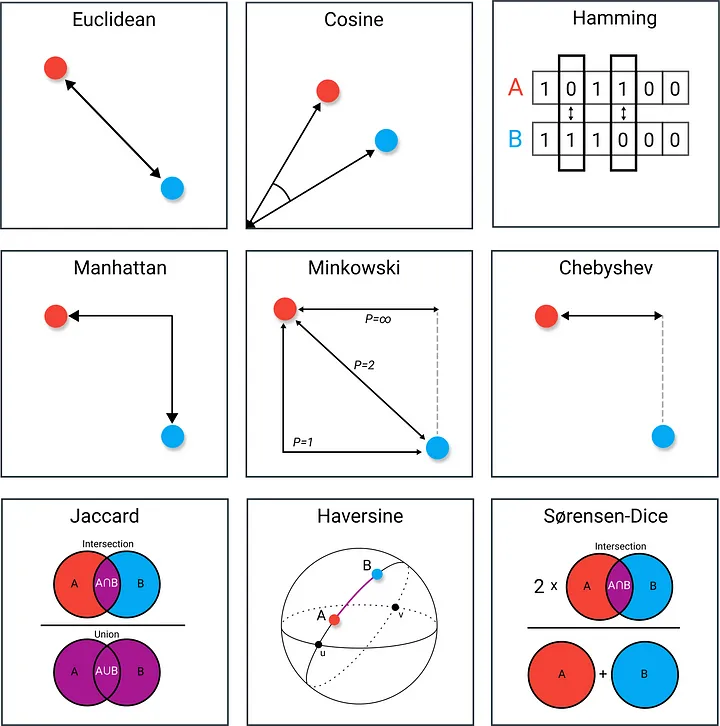

[9 distance metrics image source](https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa)

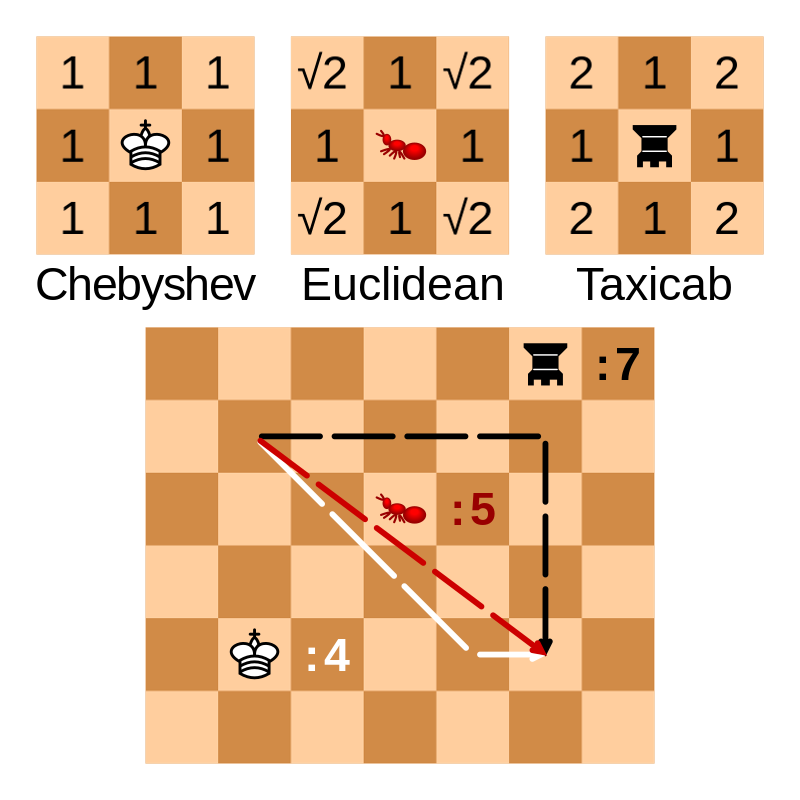

[image source wiki](https://en.wikipedia.org/wiki/Metric_space)

### Byte-sized math cookies

### Distance Metrics - General

[math](https://numerics.mathdotnet.com/Distance)

A metric or distance function is a function 
$d(x,y)$ 
that defines the distance between elements of a set as a non-negative real number. If the distance is zero, both elements are equivalent under that specific metric. Distance functions thus provide a way to measure how close two elements are, where elements do not have to be numbers but can also be vectors, matrices or arbitrary objects. Distance functions are often used as error or cost functions to be minimized in an optimization problem.

There are multiple ways to define a metric on a set. A typical distance for real numbers is the absolute difference, 
$d : (x, y) \mapsto |x-y|$.
 But a scaled version of the absolute difference, or even 
$ d(x, y) = \begin{cases} 0 & \text{if } x = y \\ 1 & \text{if } x \ne y \end{cases}  $ 
are valid metrics as well. Every normed vector space induces a distance given by 
$ d(\vec x, \vec y) = \|\vec x - \vec y\| $.

[medium](https://srikgorthy.medium.com/distance-metrics-9f5830322dee)

What is Distance?
A Distance Metric is a function with the following properties:

. Reflexivity

. Non-Negativity

. Symmetry

. Triangle Inequality



### Examples

In [5]:
a = [1, 5]
b = [5, 2]

x, y = zip(a, b)

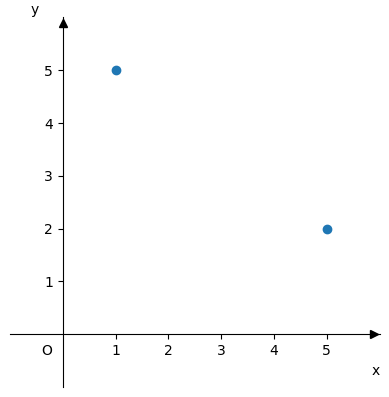

In [6]:
ax = set_coordinate_system()
ax.scatter(x, y)
plt.show()

## Distance metrics - One by one

### Minkowski Distance

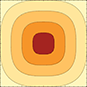 [image source](https://numerics.mathdotnet.com/Distance#Canberra-Distance)

The Minkowski distance is the generalized $L_p$-norm of the difference. The contour plot on the left demonstrates the case of p=3.
$$ d_{\mathbf{p}} : (x, y) \mapsto \|x-y\|_p = \bigg(\sum_{i=1}^{n} |x_i-y_i|^p\bigg)^\frac{1}{p} $$

In [7]:
# scipy.spatial
distance.minkowski([1,2], [2,3])

1.4142135623730951

In [8]:
def minkowski_distance_to_o(x, y):
    return distance.minkowski([x, y], [0, 0], p = 5)

minkowski_distance_to_o = np.vectorize(minkowski_distance_to_o)

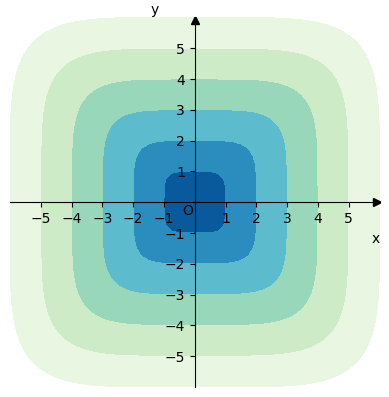

In [9]:
ax = plot_contours(minkowski_distance_to_o)
plt.show()

#### Euclidean Distance

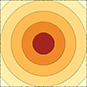 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The euclidean distance is the $L_2$-norm of the difference, a special case of the Minkowski distance with p=2. It is the natural distance in a geometric interpretation.
$$ d_{\mathbf{2}} : (x, y) \mapsto \|x-y\|_2 = \sqrt{d_{\mathbf{SSD}}} = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2} $$

In [10]:
def euclidean_distance_to_o(x, y):
    return distance.minkowski([x, y], [0, 0], p = 2)

euclidean_distance_to_o = np.vectorize(euclidean_distance_to_o)

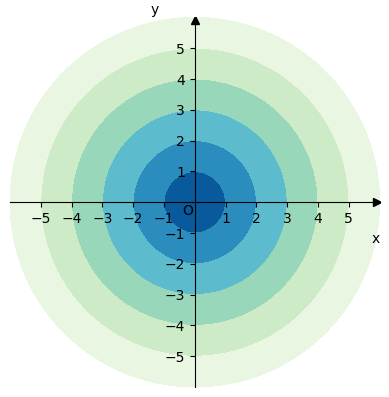

In [11]:
plot_contours(euclidean_distance_to_o)
plt.show()

#### Manhattan Distance

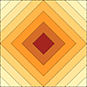 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Manhattan distance is the $L_1$-norm of the difference, a special case of the Minkowski distance with $p=1$ and equivalent to the sum of absolute difference.
$$ d_{\mathbf{1}} \equiv d_{\mathbf{SAD}} : (x, y) \mapsto \|x-y\|_1 = \sum_{i=1}^{n} |x_i-y_i| $$

In [12]:
def manhattan_distance_to_o(x, y):
    return distance.minkowski([x, y], [0, 0], p = 1)

manhattan_distance_to_o = np.vectorize(manhattan_distance_to_o)

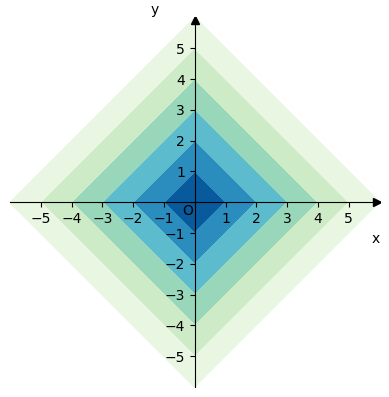

In [13]:
plot_contours(manhattan_distance_to_o)
plt.show()

##### Canberra Distance

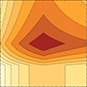 [image source](https://numerics.mathdotnet.com/Distance#Canberra-Distance)

The Canberra distance is a weighted version of the Manhattan distance, introduced and refined 1967 by Lance, Williams and Adkins. It is often used for data scattered around an origin, as it is biased for measures around the origin and very sensitive for values close to zero.
$$ d_{\mathbf{CAD}} : (x, y) \mapsto \sum_{i=1}^{n} \frac{|x_i-y_i|}{|x_i|+|y_i|} $$

In [14]:
def canberra_distance_to_one(x, y):
    return distance.canberra([x, y], [1, 1])

canberra_distance_to_one = np.vectorize(canberra_distance_to_one)

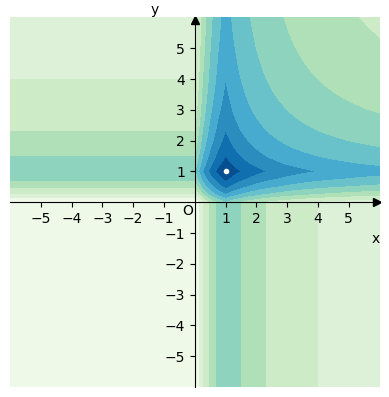

In [15]:
plot_contours(canberra_distance_to_one, levels = 10)
plt.scatter([1], [1], c = "white", marker = ".")
plt.show()

#### Chebyshev (Chessboard) Distance 


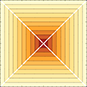 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Chebyshev distance is the $L_\infty$-norm of the difference, a special case of the Minkowski distance where p goes to infinity. It is also known as Chessboard distance.
$$ d_{\mathbf{\infty}} : (x, y) \mapsto \|x-y\|_\infty = \lim_{p \rightarrow \infty}\bigg(\sum_{i=1}^{n} |x_i-y_i|^p\bigg)^\frac{1}{p} = \max_{i} |x_i-y_i| $$

In [16]:
def chebyshev_distance_to_o(x, y):
    return distance.minkowski([x, y], [0, 0], p = np.inf)

chebyshev_distance_to_o = np.vectorize(chebyshev_distance_to_o)

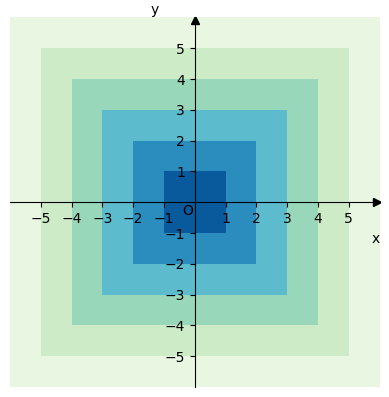

In [17]:
plot_contours(chebyshev_distance_to_o)
plt.show()

### Cosine Distance

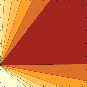 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The cosine distance contains the dot product scaled by the product of the Euclidean distances from the origin. It represents the angular distance of two vectors while ignoring their scale.

$$ d_{\mathbf{cos}} : (x, y) \mapsto 1-\frac{\langle x, y\rangle}{\|x\|_2\|y\|_2} = 1-\frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2}\sqrt{\sum_{i=1}^{n} y_i^2}} $$

In [18]:
def cosine_distance_to_one(x, y): 
    return distance.cosine([x, y], [1, 1])

cosine_distance_to_one = np.vectorize(cosine_distance_to_one)


c:\Users\diana\anaconda3\envs\maniumenv\Lib\site-packages\scipy\spatial\distance.py:647: RuntimeWarning: invalid value encountered in scalar divide
  dist = 1.0 - uv / math.sqrt(uu * vv)


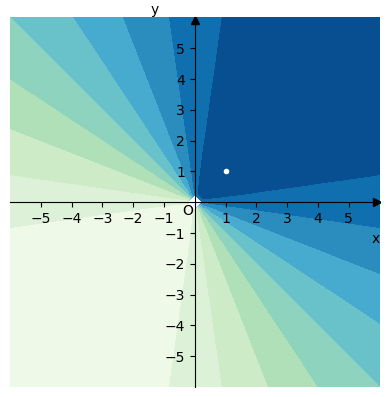

In [19]:
plot_contours(cosine_distance_to_one, levels = 10)
plt.scatter([1], [1], c = "white", marker = ".")
plt.show()

### Pearson's Distance

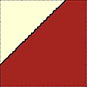 [image source](https://numerics.mathdotnet.com/Distance#Euclidean-Distance)

The Pearson distance is a correlation distance based on Pearson's product-momentum correlation coefficient of the two sample vectors. Since the correlation coefficient falls between [-1, 1], the Pearson distance lies in [0, 2] and measures the linear relationship between the two vectors.

$$ d_{\mathbf{Pearson}} : (x, y) \mapsto 1 - \mathbf{Corr}(x, y) $$

In [20]:
def pearson_distance_to_one(x, y):
    return distance.correlation([x, y], [1, 5])

pearson_distance_to_one = np.vectorize(pearson_distance_to_one)

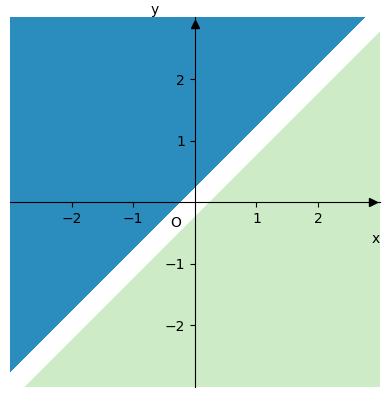

In [21]:
plot_contours(pearson_distance_to_one, x_min=-2, x_max=3, y_min=-2, y_max = 3, levels = range(3))
plt.show()

### Edit distance

In computational linguistics and computer science, edit distance is a string metric, i.e. a way of quantifying how dissimilar two strings (e.g., words) are to one another, that is measured by counting the minimum number of operations required to transform one string into the other.  In bioinformatics, it can be used to quantify the similarity of DNA sequences. [wiki]

Different definitions of an edit distance use different sets of like operations. Levenshtein distance operations are the removal, insertion, or substitution of a character in the string. Being the most common metric, the term Levenshtein distance is often used interchangeably with edit distance.

Different types of edit distance allow different sets of string operations. For instance:

+ The Levenshtein distance allows deletion, insertion and substitution.
+ The longest common subsequence (LCS) distance allows only insertion and deletion, not substitution.
+ The Hamming distance allows only substitution, hence, it only applies to strings of the same length.
+ The Damerau–Levenshtein distance allows insertion, deletion, substitution, and the transposition (swapping) of two adjacent characters.
+ The Jaro distance allows only transposition.
Some edit distances are defined as a parameterizable metric calculated with a specific set of allowed edit operations, and each operation is assigned a cost (possibly infinite). This is further generalized by DNA sequence alignment algorithms such as the Smith–Waterman algorithm, which make an operation's cost depend on where it is applied. 

__Insertion, Deletion, Substitution__

#### Hamming Distance

The hamming distance represents the number of entries in the two sample vectors which are different. It is a fundamental distance measure in information theory but less relevant in non-integer numerical problems.

In [22]:
def hamming_distance_to_one_two(x, y):
    return distance.hamming([x, y], [1, 2])

hamming_distance_to_one_two = np.vectorize(hamming_distance_to_one_two)

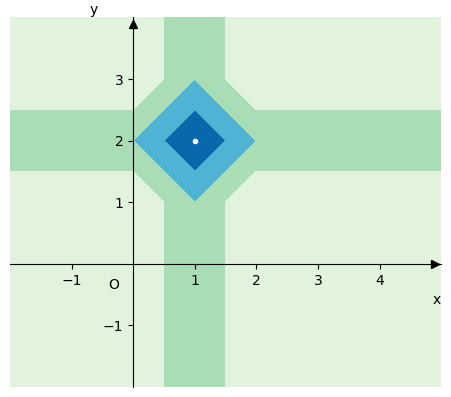

In [23]:
plot_contours(hamming_distance_to_one_two, x_min = -1, x_max = 5, y_min = -1, y_max = 4, levels = [0, 0.25, 0.5, 0.75, 1], delta = 1)
plt.scatter([1], [2], c = "white", marker = ".")
plt.show()

### Haversine Distance

sphere

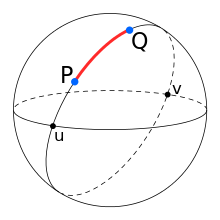

[image source - wiki](https://en.wikipedia.org/wiki/Haversine_formula)

#### Vincenty

ellipsoid

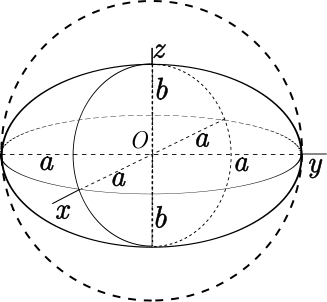

[image source](https://community.esri.com/t5/coordinate-reference-systems-blog/distance-on-an-ellipsoid-vincenty-s-formulae/ba-p/902053)

### Mahalanobis distance

distance between a point and a distribution

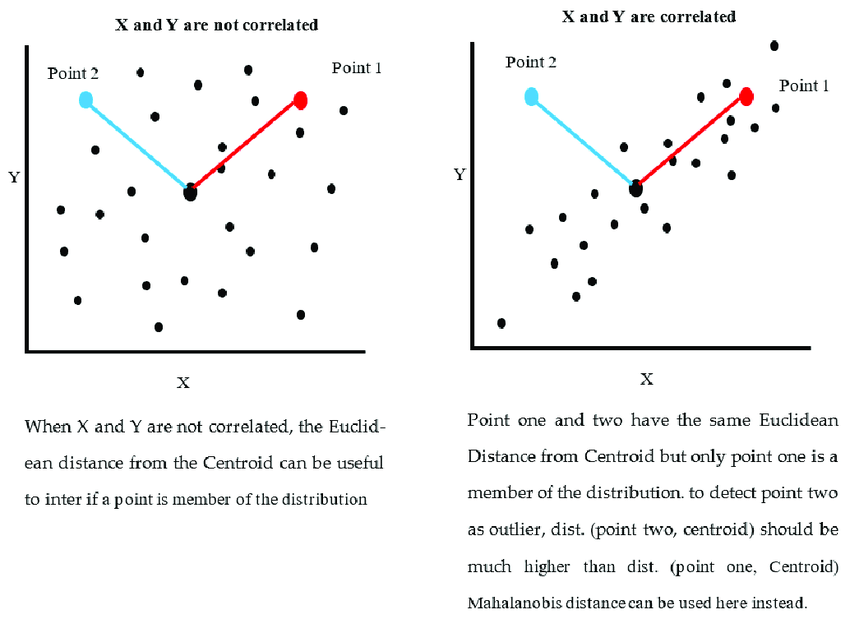

[image source](https://www.researchgate.net/figure/The-difference-between-Euclidean-and-Mahalanobis-Distance-and-how-the-Mahalanobis_fig1_363398810)

## Animations

### WHAT is distance?

Distance is the length between two things. Usually, we think of distance as a line connecting two points. Instead of A and B, lets add some context and call them Home and School. The distance between Home and School is 2 kilometers. That's the length of the straight line between them. Easiest, the most straight-forward of the distances. However it is not always the best choice. Flying from Home to School is quite unlikely (unfortunately), so we may want to measure the length of the streets. Speaking of flying, going to vacation on the other side of the world involves a flight in not so straight line ether. But back to school. The distance to School is 2 kilometers, also 3 kilometers, and also ten bus stops, or 40 minutes. These are all valid measurements, and which one we choose depends on the task at hand.

### WHY distance?

Distance not only describes the length of a line, but generally quantifies the difference between two objects. Distance functions are often used as error or cost functions to be minimized in an optimization problem. The objects do not have to be numbers, can be points, vectors, elements of an whatever-dimensional set, texts, images, humans... They all can be unambiguously compared and their difference calculated if we find an adequate metric. 


### Metric / Distance Function

A metric or distance function is a function 
$d(x,y)$ 
that defines the distance between elements of a set as a non-negative real number. Any function can be a distance function, as long as it satisfies the following properties:

0. Function
    + Before elaborating on the properties of the distance function let's explicitly state that it needs to be a function, as in math function / clean function, which means that for every set of inputs there is one and only one output. 
    + From Home to School the distance is 2 km, no matter how many times you measure it, or whether someone else measure it - it is always exactly 2 km. 
    + If there are several alternative routes, their length is NOT a valid distance measure. Distance cannot be sometimes 3, sometimes 4 km. 
    + Valid distance function would be minimum/maximum length of the several paths or some other constraint added, so that the answer is the same every time.
    + There IS a result. Could be zero, could be infinity, but there IS some output for each end every set of inputs.
    + You can measure distance from Home to School, to your Friend's House, to your Other Friend's House. There is a well defined distance between each pair of those, you can even measure the distance from one place to itself - Home to Home is 0 km
    + If you are in a maze and try to find the shortest path out, one would think the answer could be calculated with distance function. WRONG! The possibility of an answer "No way out" makes it NOT a function. A valid distance would be the shortest path between your current location and the exit, but the exit needs to exist in the first place.
    

1. Non-Negativity
    + By definition distance cannot be less than zero.
    + $d(x, y) \ge 0$
    + Distance is the answer to the question "How far is A from B?", not "In what direction?"
    + Answer is a positive number (or zero).
    + School is 2 km away from Home - you cannot walk negative distance, cannot wait negative time.
    + Even if you have a coordinate system that suggests a minus might be in order - this is for the direction! and not distance.
    + Distance can be infinite - the end of universe is (presumably) infinitely far away from Home. 
    + Distance can be zero - nothing is less far away from Home as Home - 0 is the smallest possible distance.
    + Distance means difference - Home is infinitely different from a Cat. The difference between a cat and a cat is zero. Something less different from a cat than a cat does not exist - there is no such thing as negative difference. 


2. Symmetry
    + The distance from x to y is equal to the distance from y to x
    + d(x, y) = d(y, x)
    + The distance from Home to School is 2km and the distance from School to Home is again 2km (remember, we do not account for direction)
    + The distance from Home to Bar is 300m and Bar to Home is 9876m - that is NOT a valid distance function

3. Triangle Inequality
    + For any 3 given elements, the distance between any pair of elements is smaller than the sum of the distances between the other two pairs.
    + $d(x, y) \le d(x, z) + d(y, z) $
    + Think of it as a triangle - sum of any two sides of a triangle is greater than or equal to the third side.
    + If you go grab a Coffee on the way to School, you will cover a longer distance than if you go straight from Home to School
    + The edge case "equal to" means Coffee lies on the path to School, so that distance Home to Coffee plus Coffee to School is equal to the distance from Home to School (talking about kilometers, not time, ok)
    + There is no way that you go get Coffee and cover less distance than the regular Home to School - you can call it shortcut, but you know it is NOT

4. Reflexivity
    + If two elements are the same the distance between them is zero. If the distance between two elements is zero they are the same element (at least in this metric space).
    + d(x, y) = 0 <=> x=y
    + Distance from Home to Home is 0. If the distance between The Place where You Sleep and The Place where You Write Homework is 0, then they are the same place - Home. In the context of distance between buildings, it doesn't matter if you sleep on your desk and writhe your homework in bed, or the other way around.

### Frequently used metrics

As long as a function satisfies these properties it can be a distance function (metric). Let's look into some of the most popular ones.

A typical distance for real numbers is the absolute difference, 
$d : (x, y) \mapsto |x-y|$.
 But a scaled version of the absolute difference, or even 
$ d(x, y) = \begin{cases} 0 & \text{if } x = y \\ 1 & \text{if } x \ne y \end{cases}  $ 
are valid metrics as well. Every normed vector space induces a distance given by 
$ d(\vec x, \vec y) = \|\vec x - \vec y\| $.

### Eucledean, Manhatten, Chebishev, Minkowski

### Cosine

### Edit, Levenstein, Hamming